In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.naive_bayes import MultinomialNB


/home/abhi/.local/lib/python3.10/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Import SMS Data

In [2]:
df = pd.read_csv('spamraw.csv')
df.head()

,type,text
0,ham,Hope you are having a good week. Just checking in
1,ham,K..give back my thanks.
2,ham,Am also doing in cbe only. But have to pay.
3,spam,"complimentary 4 STAR Ibiza Holiday or £10,000 ..."
4,spam,okmail: Dear Dave this is your final notice to...


# EDA

In [3]:
#finding count and unique count of all the messages
df.describe()

,type,text
count,5559,5559
unique,2,5156
top,ham,"Sorry, I'll call later"
freq,4812,30


In [4]:
#Extract SPAM messages
spam_messages = df[df["type"]=="spam"]
spam_messages.head()

,type,text
3,spam,"complimentary 4 STAR Ibiza Holiday or £10,000 ..."
4,spam,okmail: Dear Dave this is your final notice to...
8,spam,Marvel Mobile Play the official Ultimate Spide...
19,spam,U can WIN £100 of Music Gift Vouchers every we...
34,spam,U have won a nokia 6230 plus a free digital ca...


In [5]:
#find count and unique message count of SPAM messages.
spam_messages.describe()

,type,text
count,747,747
unique,1,653
top,spam,Please call our customer service representativ...
freq,747,4


<AxesSubplot: >

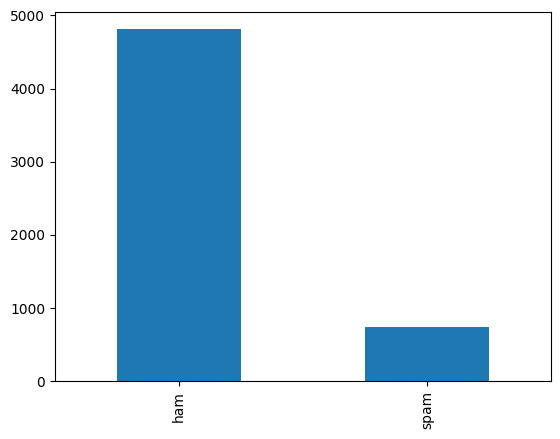

In [6]:
#plot the count of HAM(non spam) vs SPAM
df.type.value_counts().plot.bar()

# Splitting the SMS data into test and train data

In [7]:
data_train, data_test, labels_train, labels_test = train_test_split(df.text,df.type,test_size= 0.2,random_state = 0)

# Extraction & CountVectorize

In [8]:
vectorizer = CountVectorizer()
data_train_count = vectorizer.fit_transform(data_train)
data_test_count = vectorizer.transform(data_test)

# Modelling & Training 

In [9]:
clf = MultinomialNB()
clf.fit(data_train_count, labels_train)
prediction = clf.predict(data_test_count)

In [10]:
print("accuracy_score:",accuracy_score(labels_test, prediction))

accuracy_score: 0.9901079136690647


# Confusion Matrix

In [11]:
print("confusion_matrix:\n",confusion_matrix(labels_test, prediction))

confusion_matrix:
 [[979   0]
 [ 11 122]]
